## Student Name : Nasrin Sultana Nipa
## Course :       CS- 5623 (Fundamental of Data Science)
## Due Date:      Tuesday, February 6
### Olive Oil Analysis : Python Project using Jupyter Notebook

NOTE: This project uses an olive oil dataset originally published in:

Massart, D. L., Vandeginste, B. G. M., Buydens, L. M. C., de Jong, S., Lewi, P. J., Smeyers-Verbeke, J. (1998) Handbook of Chemometrics and Qualimetrics: Part B. Elsevier. Tables 35.1 and 35.4.

## Required Packages
Using Python with the pandas library, matplotlib and seaborn for plotting, reproduce the analysation report.

`numpy  pandas  seaborn  matplotlib`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

#to adjust the appearance of seaborn plots and 
#set up matplotlib for inline plotting
sb.set_context("notebook", font_scale=2.5)
%matplotlib inline

C:\Users\nasrin\AppData\Local\Temp\ipykernel_5924\1166662079.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Loading

Here, CSV files are loading into pandas DataFrames using the 'pd.read_csv()'' function. 

- I load the first CSV file, 'olive_oil_chemical.csv', into a DataFrame named 'df1'.  
- Then, the second CSV file 'olive_oil_sensory.csv' as DataFrame named 'df2'.

And then use display() to show the DataFrames.

In [2]:
# Load the CSV files into DataFrames
df1 = pd.read_csv('olive_oil_chemical.csv')
display(df1)

,region,c_Acidity,c_Peroxide,c_K232,c_K270,c_DK
0,G1,0.73,12.70,1.900,0.1390,0.003
1,G2,0.19,12.30,1.678,0.1160,-0.004
2,G3,0.26,10.30,1.629,0.1160,-0.005
3,G4,0.67,13.70,1.701,0.1680,-0.002
4,G5,0.52,11.20,1.539,0.1190,-0.001
5,I1,0.26,18.70,2.117,0.1420,0.001
6,I2,0.24,15.30,1.891,0.1160,0.000
7,I3,0.30,18.50,1.908,0.1250,0.001
8,I4,0.35,15.60,1.824,0.1040,0.000
9,I5,0.19,19.40,2.222,0.1580,-0.003


# Insight for "olive-oil_chemical.csv" file:
- The table includes data for different regions labeled as 'G' for Greek, 'I' for Italian, and 'S' for Spanish. 
- It is clearly seen that the olive oil from Greek contains higher acidic properties. 
- But for chemical property named "peroxide", Italian olive oil has higher value.
- However, spanish ovile has optimum level of both (acid, peroxide) chemical properties.

In [3]:
df2 = pd.read_csv('olive_oil_sensory.csv')
display(df2)

,region,s_yellow,s_green,s_brown,s_glossy,s_transp,s_syrup
0,G1,21.4,73.4,10.1,79.7,75.2,50.3
1,G2,23.4,66.3,9.8,77.8,68.7,51.7
2,G3,32.7,53.5,8.7,82.3,83.2,45.4
3,G4,30.2,58.3,12.2,81.1,77.1,47.8
4,G5,51.8,32.5,8.0,72.4,65.3,46.5
5,I1,40.7,42.9,20.1,67.7,63.5,52.2
6,I2,53.8,30.4,11.5,77.8,77.3,45.2
7,I3,26.4,66.5,14.2,78.7,74.6,51.8
8,I4,65.7,12.1,10.3,81.6,79.6,48.3
9,I5,45.0,31.9,28.4,75.7,72.9,52.8


## Insight for "olive-oil_sensory.csv" file:
- This table also includes data for different regions labeled as 'G' for Greek, 'I' for Italian, and 'S' for Spanish. 
- Here, we can see that gree olive oil mostly found in Greece and this olives have glossy look and contains good level of syrup or juice.
- Moreover, yellow olive oil found in Spanish and glossier than the greek ones but less jucier than others.
- For Italy, the result actually moderate for most of the qualities.

## Merged DataFrame

The merged DataFrame, named 'oil', combines the chemical and sensory data for olive oil from different regions. It contains information on various chemical properties as well as sensory attributes, providing a comprehensive overview of the quality and characteristics of olive oil across different regions.

Key points to note from the merged DataFrame:

- Data Integration: The merge operation combines the information from the two original DataFrames based on the 'region' column, allowing for a unified analysis of both chemical and sensory data.

- Expanded Dataset: By merging the DataFrames, we have expanded the dataset to include a wider range of variables, enabling more comprehensive analyses and insights.

In [4]:
# Merge the DataFrames
oil = pd.merge(df1, df2, on='region', how='left')
display(oil)

,region,c_Acidity,c_Peroxide,c_K232,c_K270,c_DK,s_yellow,s_green,s_brown,s_glossy,s_transp,s_syrup
0,G1,0.73,12.70,1.900,0.1390,0.003,21.4,73.4,10.1,79.7,75.2,50.3
1,G2,0.19,12.30,1.678,0.1160,-0.004,23.4,66.3,9.8,77.8,68.7,51.7
2,G3,0.26,10.30,1.629,0.1160,-0.005,32.7,53.5,8.7,82.3,83.2,45.4
3,G4,0.67,13.70,1.701,0.1680,-0.002,30.2,58.3,12.2,81.1,77.1,47.8
4,G5,0.52,11.20,1.539,0.1190,-0.001,51.8,32.5,8.0,72.4,65.3,46.5
5,I1,0.26,18.70,2.117,0.1420,0.001,40.7,42.9,20.1,67.7,63.5,52.2
6,I2,0.24,15.30,1.891,0.1160,0.000,53.8,30.4,11.5,77.8,77.3,45.2
7,I3,0.30,18.50,1.908,0.1250,0.001,26.4,66.5,14.2,78.7,74.6,51.8
8,I4,0.35,15.60,1.824,0.1040,0.000,65.7,12.1,10.3,81.6,79.6,48.3
9,I5,0.19,19.40,2.222,0.1580,-0.003,45.0,31.9,28.4,75.7,72.9,52.8


## Insights from Combined Table:
Upon examining the merged DataFrame,we observe significant variability in both chemical and sensory attribute. For Example,
- c_Acidity and s_yellow inversely related. The higher the acidity is, the lower the production of yellow olive oil. 
- c_DK, s_glossy and s_transp demonstrate the negative potential correlation with each other. the more negative the value is, the more glossy and transparent the oil is.

After creating the combined table named "oil" using left join on the common column "region", we have erased that column from the combined table.

In [5]:
oil = pd.merge(df1, df2, on='region', how='left')
oil = oil.drop(columns=['region'])
display(oil)

,c_Acidity,c_Peroxide,c_K232,c_K270,c_DK,s_yellow,s_green,s_brown,s_glossy,s_transp,s_syrup
0,0.73,12.70,1.900,0.1390,0.003,21.4,73.4,10.1,79.7,75.2,50.3
1,0.19,12.30,1.678,0.1160,-0.004,23.4,66.3,9.8,77.8,68.7,51.7
2,0.26,10.30,1.629,0.1160,-0.005,32.7,53.5,8.7,82.3,83.2,45.4
3,0.67,13.70,1.701,0.1680,-0.002,30.2,58.3,12.2,81.1,77.1,47.8
4,0.52,11.20,1.539,0.1190,-0.001,51.8,32.5,8.0,72.4,65.3,46.5
5,0.26,18.70,2.117,0.1420,0.001,40.7,42.9,20.1,67.7,63.5,52.2
6,0.24,15.30,1.891,0.1160,0.000,53.8,30.4,11.5,77.8,77.3,45.2
7,0.30,18.50,1.908,0.1250,0.001,26.4,66.5,14.2,78.7,74.6,51.8
8,0.35,15.60,1.824,0.1040,0.000,65.7,12.1,10.3,81.6,79.6,48.3
9,0.19,19.40,2.222,0.1580,-0.003,45.0,31.9,28.4,75.7,72.9,52.8


## 1. Calculating Correlation Matrix
- the 'corr()' function computes pairwise correlation of columns. This results in a square matrix where each cell represents the correlation coefficient between two columns.
## 2. Plot Correlation Heatmap

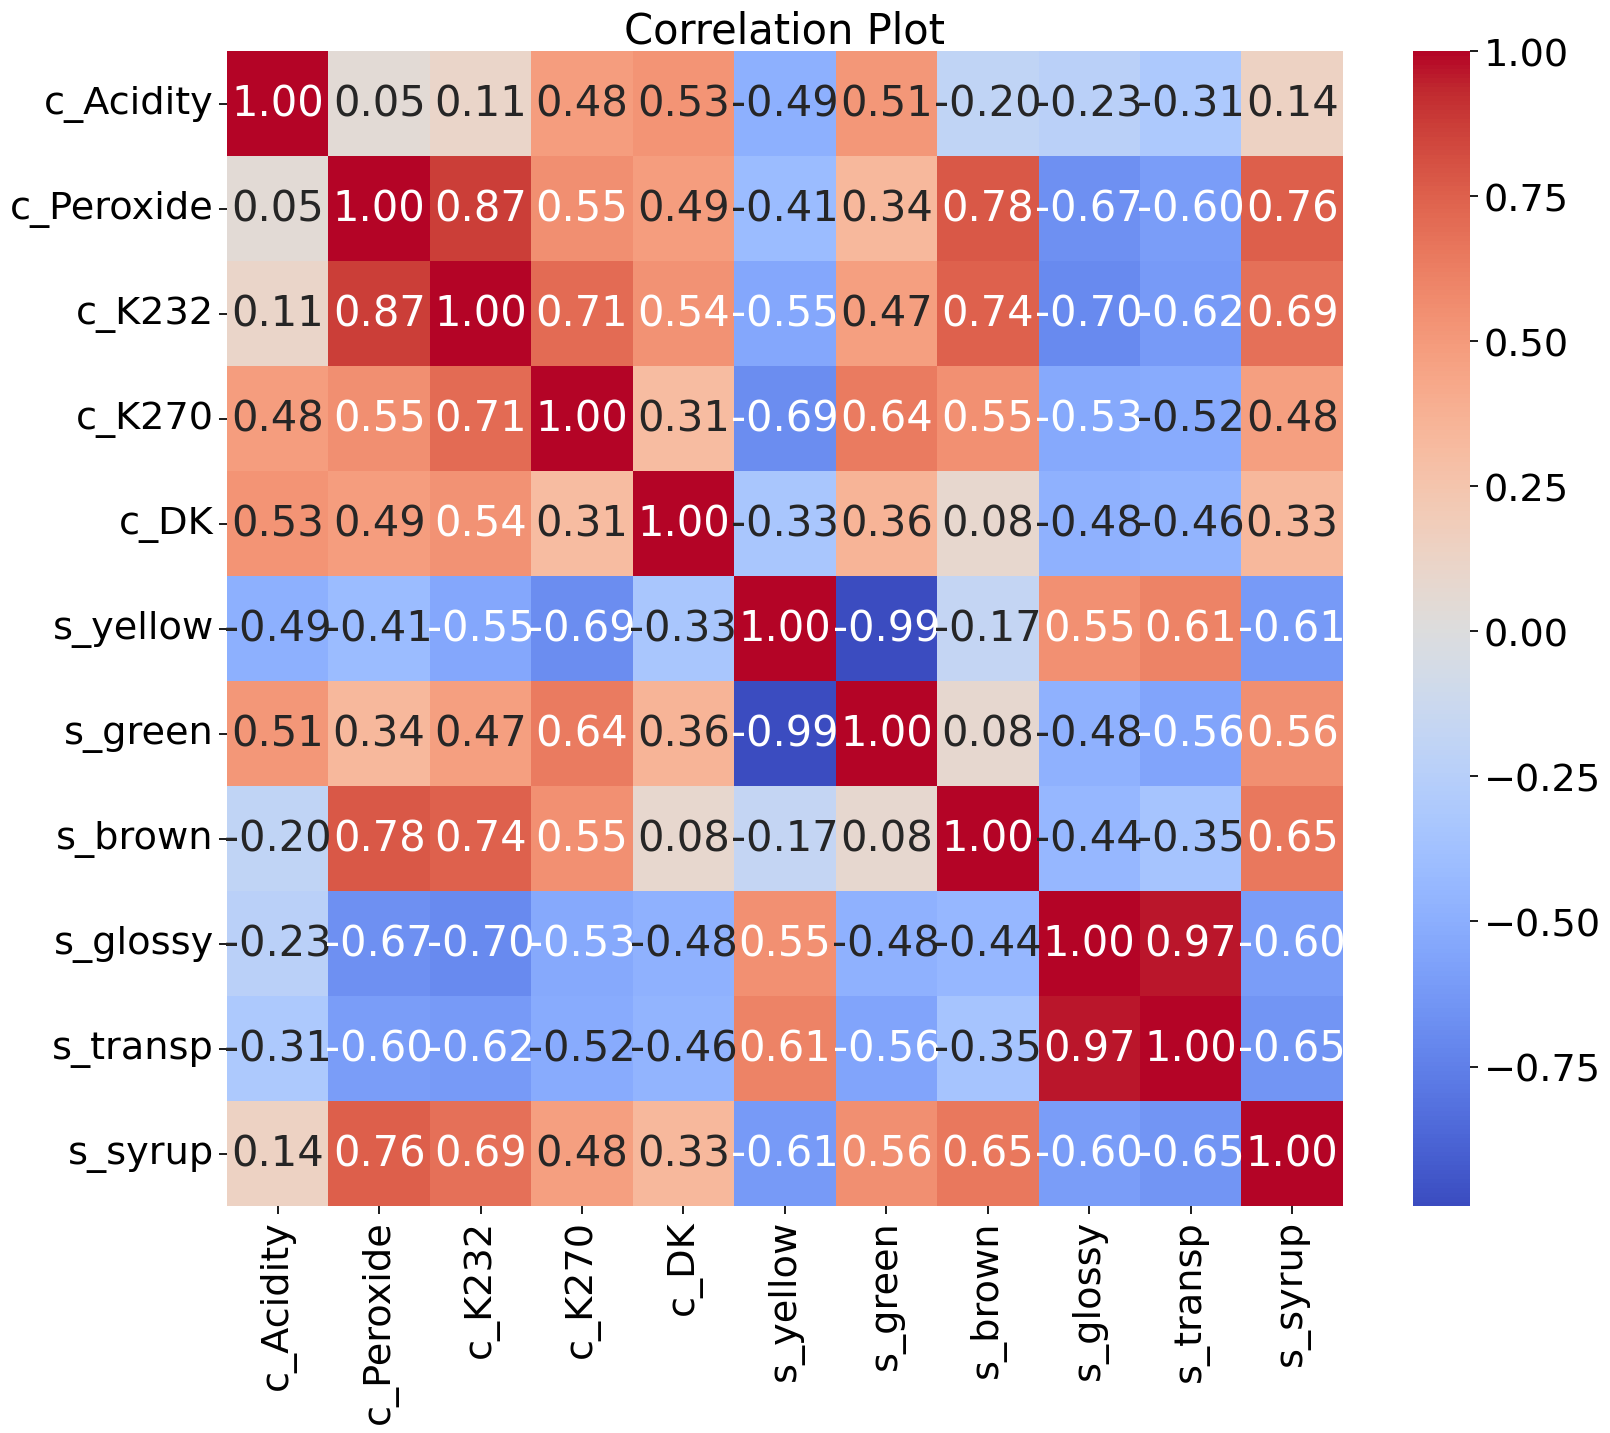

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = oil.corr()

# Plot correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()


## Here, it is seen that diagonally we have higher values which is unique value 1.
## Moreover, we can see that s_yellow and s_green have fully inverse properties to each other.

## Extract Numeric Values: This effectively filter out categorical columns then generate 'numeric_vars' DataFrame containing only the numeric values.

In [7]:
# Assuming var_cols contains the names of numeric variables
var_cols = oil.select_dtypes(include=['float64', 'int64']).columns

# Assuming var_cols contains the names of numeric variables
numeric_vars = oil[var_cols]

numeric_vars

,c_Acidity,c_Peroxide,c_K232,c_K270,c_DK,s_yellow,s_green,s_brown,s_glossy,s_transp,s_syrup
0,0.73,12.70,1.900,0.1390,0.003,21.4,73.4,10.1,79.7,75.2,50.3
1,0.19,12.30,1.678,0.1160,-0.004,23.4,66.3,9.8,77.8,68.7,51.7
2,0.26,10.30,1.629,0.1160,-0.005,32.7,53.5,8.7,82.3,83.2,45.4
3,0.67,13.70,1.701,0.1680,-0.002,30.2,58.3,12.2,81.1,77.1,47.8
4,0.52,11.20,1.539,0.1190,-0.001,51.8,32.5,8.0,72.4,65.3,46.5
5,0.26,18.70,2.117,0.1420,0.001,40.7,42.9,20.1,67.7,63.5,52.2
6,0.24,15.30,1.891,0.1160,0.000,53.8,30.4,11.5,77.8,77.3,45.2
7,0.30,18.50,1.908,0.1250,0.001,26.4,66.5,14.2,78.7,74.6,51.8
8,0.35,15.60,1.824,0.1040,0.000,65.7,12.1,10.3,81.6,79.6,48.3
9,0.19,19.40,2.222,0.1580,-0.003,45.0,31.9,28.4,75.7,72.9,52.8


## Summary Statistics: This computes descriptive statistics for the numeric columns in the DataFrame 'oil', this generates count, mean, standard deviation, minimum, quartiles and maximum values for each numeric column.

In [8]:
summary_stats = oil.describe()
summary_stats

,c_Acidity,c_Peroxide,c_K232,c_K270,c_DK,s_yellow,s_green,s_brown,s_glossy,s_transp,s_syrup
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000
mean,0.311875,13.252500,1.708250,0.118144,-0.001750,50.875000,33.512500,12.331250,80.81250,78.193750,47.975000
std,0.176568,3.345141,0.248731,0.023707,0.002236,19.458623,23.486986,5.128706,6.18804,8.307384,3.065398
min,0.150000,8.140000,1.331000,0.085000,-0.005000,21.400000,9.700000,8.000000,67.70000,63.500000,42.300000
25%,0.190000,10.950000,1.536000,0.101500,-0.003250,32.075000,12.075000,10.025000,77.80000,74.175000,46.150000
50%,0.260000,12.400000,1.653500,0.116000,-0.002000,52.800000,31.150000,10.800000,80.40000,77.200000,47.500000
75%,0.312500,15.375000,1.893250,0.128500,0.000000,68.800000,54.700000,11.975000,85.37500,84.875000,50.650000
max,0.730000,19.400000,2.222000,0.168000,0.003000,73.500000,73.400000,28.400000,89.90000,89.700000,52.800000


## Boxplot Visualization using Seaborn library.
- to prevent overlap for the attributes name, i rotate the x-axis labels by 45 degress to improve readability. 

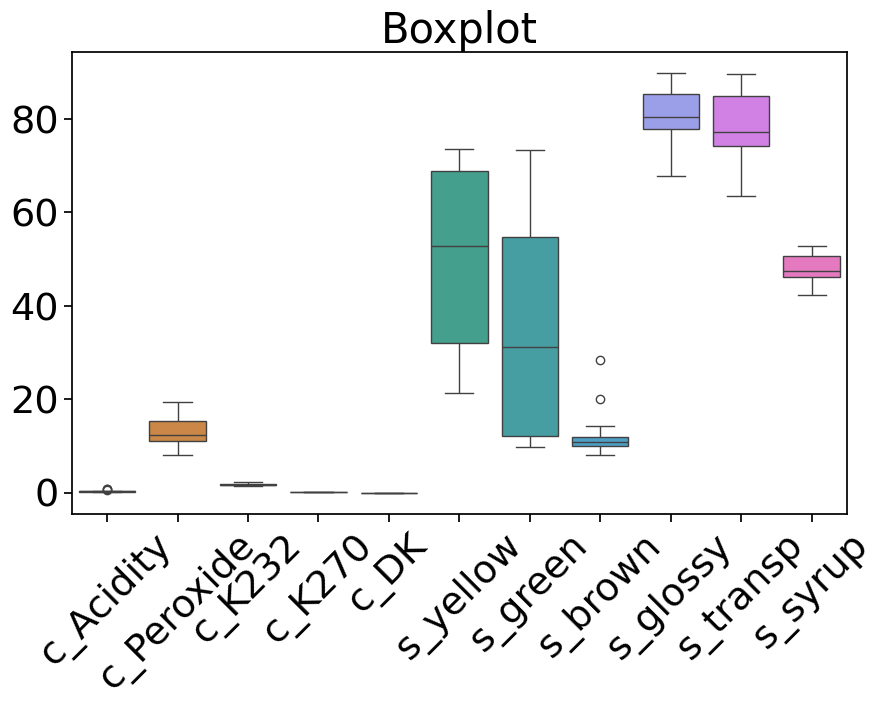

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=oil)
plt.xticks(rotation=45)
plt.title('Boxplot')
plt.show() #describe

## Observation on BoxPlot:
Concentrated Value:
- For c_Acidity, c_K232, c_K270, c_DK attributes may be all the variables have almost same value. Here the data is more concentrated around the median.

Central Tendency: 
- For the variables "c_Peroxide, s_glossy, s_transp, s_syrup" data screwed too much towards lower values.
- For "s_brown" attribute we get symmetric values.
- The central tendency of "s_green" is lower than the lower value of "s_yellow".

Spread and Variability:
- The width of the boxplot of attribute "s_green" represents the spread and variability of data. It has wider variance.
- Attribute "s_yellow" also has wide variance but less than "s_green".
- data are more spread out for these attributes.

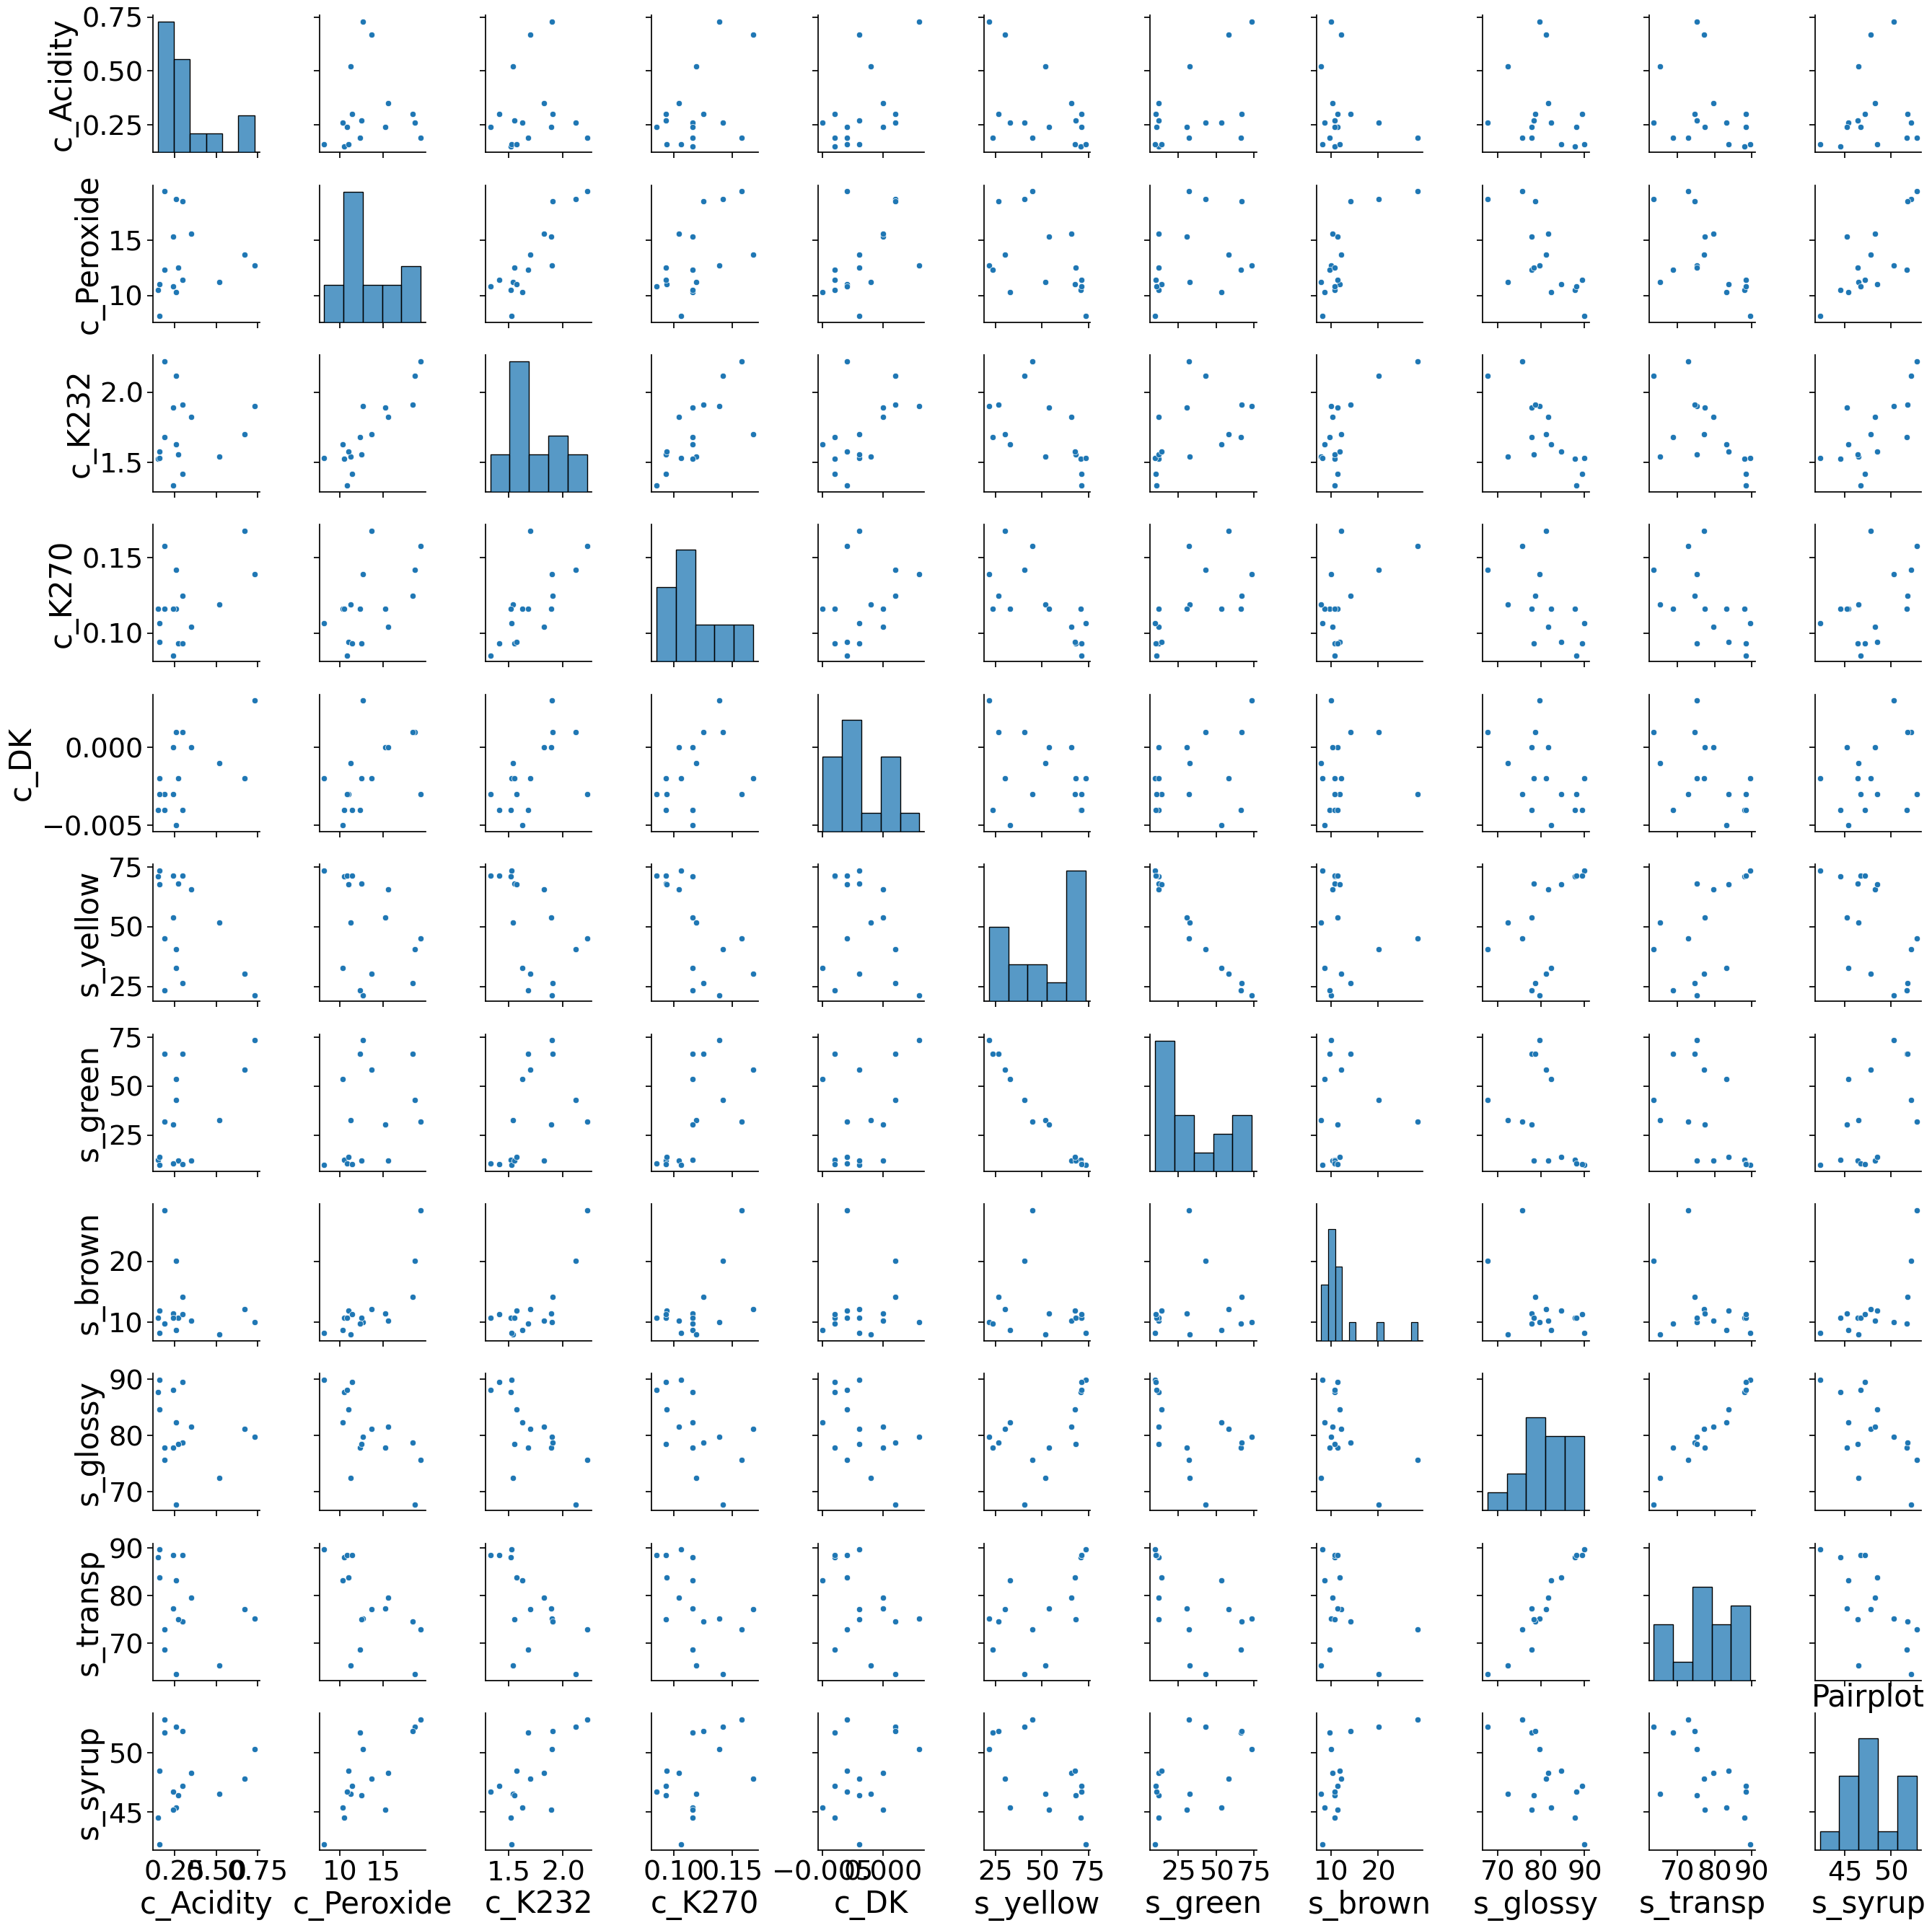

In [10]:
sns.pairplot(oil)
plt.title('Pairplot')
plt.show()

## Observation on Pairplot:
- Relationship between s_glossy and s_transp is propotional to each other.
- Relationship between s_green and s_yellow is inversely propotional to each other.
- "s_brown" has some discrete values.

## Histogram:
This code generates a histogram for the "c_Acidity" variable from the DataFrame "oil".
- plt.hist(oil['c_Acidity'].astype(float), bins=20): This line creates the histogram. It takes the 'c_Acidity' column from the 'oil' DataFrame, converts its values to float data type using 
'.astype(float)', 
- and then plots the histogram with 20 bins.

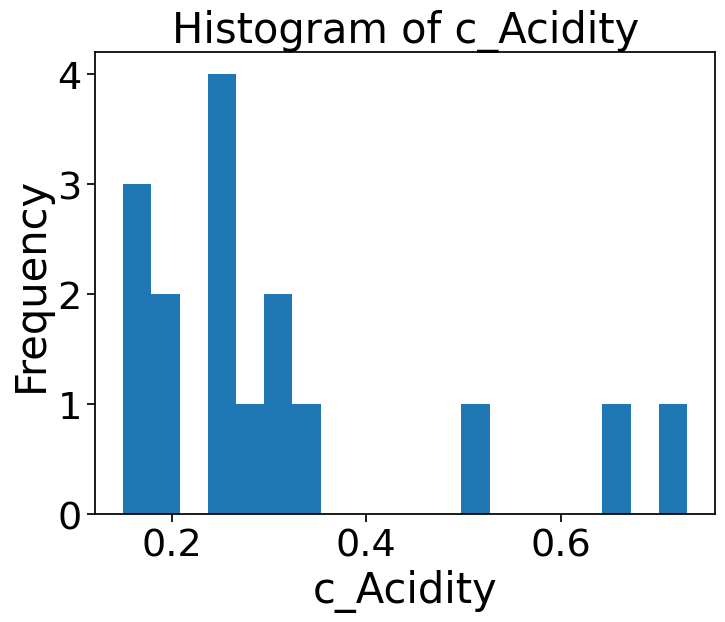

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(oil['c_Acidity'].astype(float), bins=20)
plt.title('Histogram of c_Acidity')
plt.xlabel('c_Acidity')
plt.ylabel('Frequency')
plt.show()

## Observation on Histogram based on single attribute "c_Acidity":
- The shape of the distribution demonstrate that central tendency of data screwed to the left.
- Higher bars indicate a higher frequency of data points within range.

## Compute Mean and Median: 
Compute mean and median for each numeric column.

In [12]:
mean_values = oil.mean()
median_values = oil.median()
difference = mean_values - median_values
print("Mean Values:")
print(mean_values)
print("\nMedian Values:")
print(median_values)
print("\nDifference between Mean and Median:")
print(difference)

Mean Values:
c_Acidity      0.311875
c_Peroxide    13.252500
c_K232         1.708250
c_K270         0.118144
c_DK          -0.001750
s_yellow      50.875000
s_green       33.512500
s_brown       12.331250
s_glossy      80.812500
s_transp      78.193750
s_syrup       47.975000
dtype: float64

Median Values:
c_Acidity      0.2600
c_Peroxide    12.4000
c_K232         1.6535
c_K270         0.1160
c_DK          -0.0020
s_yellow      52.8000
s_green       31.1500
s_brown       10.8000
s_glossy      80.4000
s_transp      77.2000
s_syrup       47.5000
dtype: float64

Difference between Mean and Median:
c_Acidity     0.051875
c_Peroxide    0.852500
c_K232        0.054750
c_K270        0.002144
c_DK          0.000250
s_yellow     -1.925000
s_green       2.362500
s_brown       1.531250
s_glossy      0.412500
s_transp      0.993750
s_syrup       0.475000
dtype: float64


## Observations on the mean, median, and the difference between them for each column:

c_Acidity:
The mean acidity level is slightly higher (0.3119) than the median (0.2600), indicating a slightly right-skewed distribution.
The difference between the mean and median (0.0519) suggests a moderate degree of skewness.

c_Peroxide:
The mean peroxide value (13.2525) is higher than the median (12.4000), indicating a right-skewed distribution.
The difference between the mean and median (0.8525) suggests a noticeable skewness with a longer right tail.

c_K232:
The mean value (1.7083) is slightly higher than the median (1.6535), indicating a slight right skew.
The difference between the mean and median (0.0548) suggests a mild skewness towards higher values.

c_K270:
The mean (0.1181) is slightly higher than the median (0.1160), indicating a minor right skew.
The difference between the mean and median (0.0021) suggests a slight skewness, though the effect is minimal.

c_DK:
The mean and median are close (mean: -0.0018, median: -0.0020), indicating a relatively symmetric distribution.

s_yellow to s_syrup:
For all sensory attributes, the mean and median values are relatively close, indicating symmetric distributions.
The difference between the mean and median (0.0003) is negligible, suggesting little to no skewness.
s_yellow to s_syrup:

For all sensory attributes, the mean and median values are relatively close, indicating symmetric distributions.
The differences between the mean and median are generally small, suggesting minimal skewness in these attributes.
Overall, the observations suggest that most of the sensory attributes have symmetric distributions with minimal skewness, while some chemical attributes demonstrate slight to moderate right skewness, as indicated by the differences between the mean and median.

## END ##############################################